In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from datetime import datetime

In [2]:
url = "ResaleFlatPricesBasedonApprovalDate19901999.csv"
df = pd.read_csv(url)

In [3]:
url = "ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv"
df2 = pd.read_csv(url)

In [4]:
url = "ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv"
df3 = pd.read_csv(url)

In [5]:
url = "ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv"
df4 = pd.read_csv(url)

In [6]:
url = "ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv"
df5 = pd.read_csv(url)

In [7]:
flat_df=pd.concat([df, df2, df3, df4, df5], ignore_index=True)

In [8]:
flat_df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
927272,2024-04,YISHUN,EXECUTIVE,836,YISHUN ST 81,04 TO 06,142.0,Apartment,1988,805000.0,62 years 10 months
927273,2024-05,YISHUN,EXECUTIVE,834,YISHUN ST 81,04 TO 06,154.0,Maisonette,1988,948000.0,62 years 09 months
927274,2024-06,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,1000000.0,62 years 08 months
927275,2024-02,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,04 TO 06,164.0,Multi Generation,1987,998000.0,62 years 11 months


In [9]:
flat_df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [10]:
# Dropping Column, it has 7L plus Null Values:

flat_df.drop(columns=['remaining_lease'], inplace=True)

In [11]:
flat_df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

In [12]:
flat_df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0
...,...,...,...,...,...,...,...,...,...,...
927272,2024-04,YISHUN,EXECUTIVE,836,YISHUN ST 81,04 TO 06,142.0,Apartment,1988,805000.0
927273,2024-05,YISHUN,EXECUTIVE,834,YISHUN ST 81,04 TO 06,154.0,Maisonette,1988,948000.0
927274,2024-06,YISHUN,EXECUTIVE,826,YISHUN ST 81,10 TO 12,146.0,Maisonette,1988,1000000.0
927275,2024-02,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,04 TO 06,164.0,Multi Generation,1987,998000.0


## Feature Engineering

In [13]:
flat_df.rename(columns={'month': 'yearly_month'}, inplace=True)

In [14]:
flat_df[['storey_start_point', 'storey_end_point']] = flat_df['storey_range'].str.split(' TO ', expand=True)

# Convert the new columns to integers
flat_df['storey_start_point'] = flat_df['storey_start_point'].astype(int)
flat_df['storey_end_point'] = flat_df['storey_end_point'].astype(int)

flat_df[['year', 'month']] = flat_df['yearly_month'].str.split('-', expand=True)

flat_df['year']=flat_df['year'].astype(int)
flat_df['month']=flat_df['month'].astype(int)

current_year = datetime.now().year
flat_df['remaining_lease'] = current_year - pd.to_datetime(flat_df['lease_commence_date']).dt.year

flat_df.rename(columns={'lease_commence_date': 'lease_commence_year'}, inplace=True)

flat_df['price_per_sqm']=flat_df['resale_price'] // flat_df['floor_area_sqm']


In [15]:
# Drop Columns:

flat_df.drop(columns=['storey_range'], inplace=True)
flat_df.drop(columns=['yearly_month'], inplace=True)


In [16]:
flat_df

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_year,resale_price,storey_start_point,storey_end_point,year,month,remaining_lease,price_per_sqm
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,9000.0,10,12,1990,1,54,290.0
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,4,6,1990,1,54,193.0
2,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,8000.0,10,12,1990,1,54,258.0
3,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,7,9,1990,1,54,193.0
4,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,47200.0,4,6,1990,1,54,646.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927272,YISHUN,EXECUTIVE,836,YISHUN ST 81,142.0,Apartment,1988,805000.0,4,6,2024,4,54,5669.0
927273,YISHUN,EXECUTIVE,834,YISHUN ST 81,154.0,Maisonette,1988,948000.0,4,6,2024,5,54,6155.0
927274,YISHUN,EXECUTIVE,826,YISHUN ST 81,146.0,Maisonette,1988,1000000.0,10,12,2024,6,54,6849.0
927275,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,164.0,Multi Generation,1987,998000.0,4,6,2024,2,54,6085.0


## Skewness & Outliers


In [17]:
resale_df=flat_df.copy()
resale_df.head()

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_year,resale_price,storey_start_point,storey_end_point,year,month,remaining_lease,price_per_sqm
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,9000.0,10,12,1990,1,54,290.0
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,4,6,1990,1,54,193.0
2,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,8000.0,10,12,1990,1,54,258.0
3,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,7,9,1990,1,54,193.0
4,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,47200.0,4,6,1990,1,54,646.0


In [18]:
# Skewness Check:

from scipy.stats import skew

for col in ['floor_area_sqm','lease_commence_year','storey_start_point','storey_end_point','resale_price','price_per_sqm','year','month']:
    print(f'Skewness of {col}: {skew(resale_df[col])}')


Skewness of floor_area_sqm: 0.36611705042901593
Skewness of lease_commence_year: 0.6469041148437663
Skewness of storey_start_point: 1.3516475076925472
Skewness of storey_end_point: 1.352342867700813
Skewness of resale_price: 0.9410915452450523
Skewness of price_per_sqm: 1.0715884938508975
Skewness of year: 0.2943354652804587
Skewness of month: -0.027415279086124622


In [19]:
# Skewness Check:

from scipy.stats import skew

for col in ['storey_start_point','storey_end_point','price_per_sqm','resale_price']:
    print(f'Skewness of {col}: {skew(resale_df[col])}')


Skewness of storey_start_point: 1.3516475076925472
Skewness of storey_end_point: 1.352342867700813
Skewness of price_per_sqm: 1.0715884938508975
Skewness of resale_price: 0.9410915452450523


In [20]:
# Apply square root transformation
skew_columns = ['storey_start_point', 'storey_end_point', 'price_per_sqm', 'resale_price']

for col in skew_columns:
    resale_df[col + '_sqrt'] = np.sqrt(resale_df[col])

# Check skewness after square root transformation
for col in skew_columns:
    print(f"Skewness of {col} after sqrt transformation: {skew(resale_df[col + '_sqrt'].dropna())}")


Skewness of storey_start_point after sqrt transformation: 0.14610713319968296
Skewness of storey_end_point after sqrt transformation: 0.41369538489942964
Skewness of price_per_sqm after sqrt transformation: 0.21736244952270256
Skewness of resale_price after sqrt transformation: 0.10857138732486472


In [21]:
resale_df.drop(columns=['storey_start_point','storey_end_point','resale_price','price_per_sqm'], inplace=True)

In [22]:
resale_df

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_year,year,month,remaining_lease,storey_start_point_sqrt,storey_end_point_sqrt,price_per_sqm_sqrt,resale_price_sqrt
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,1990,1,54,3.162278,3.464102,17.029386,94.868330
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,1990,1,54,2.000000,2.449490,13.892444,77.459667
2,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,1990,1,54,3.162278,3.464102,16.062378,89.442719
3,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,1990,1,54,2.645751,3.000000,13.892444,77.459667
4,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,1990,1,54,2.000000,2.449490,25.416530,217.255610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927272,YISHUN,EXECUTIVE,836,YISHUN ST 81,142.0,Apartment,1988,2024,4,54,2.000000,2.449490,75.292762,897.217922
927273,YISHUN,EXECUTIVE,834,YISHUN ST 81,154.0,Maisonette,1988,2024,5,54,2.000000,2.449490,78.453808,973.652916
927274,YISHUN,EXECUTIVE,826,YISHUN ST 81,146.0,Maisonette,1988,2024,6,54,3.162278,3.464102,82.758685,1000.000000
927275,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,164.0,Multi Generation,1987,2024,2,54,2.000000,2.449490,78.006410,998.999499


In [23]:
# function for box plot, hist plot, violin plot to understand through visualize
import matplotlib.pyplot as plt
import seaborn as sns

def plot(df, column):
    plt.figure(figsize=(20,5))

    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column, color='green')
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50, color="red")
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column, color='indigo')
    plt.title(f'Violin Plot for {column}')
    plt.show()

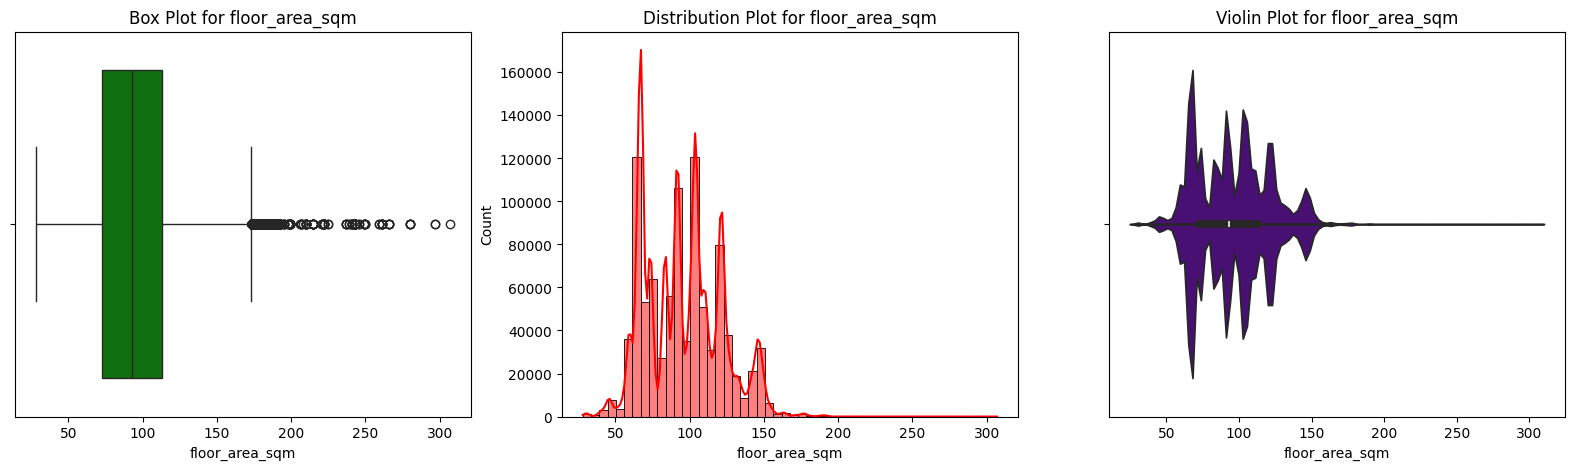

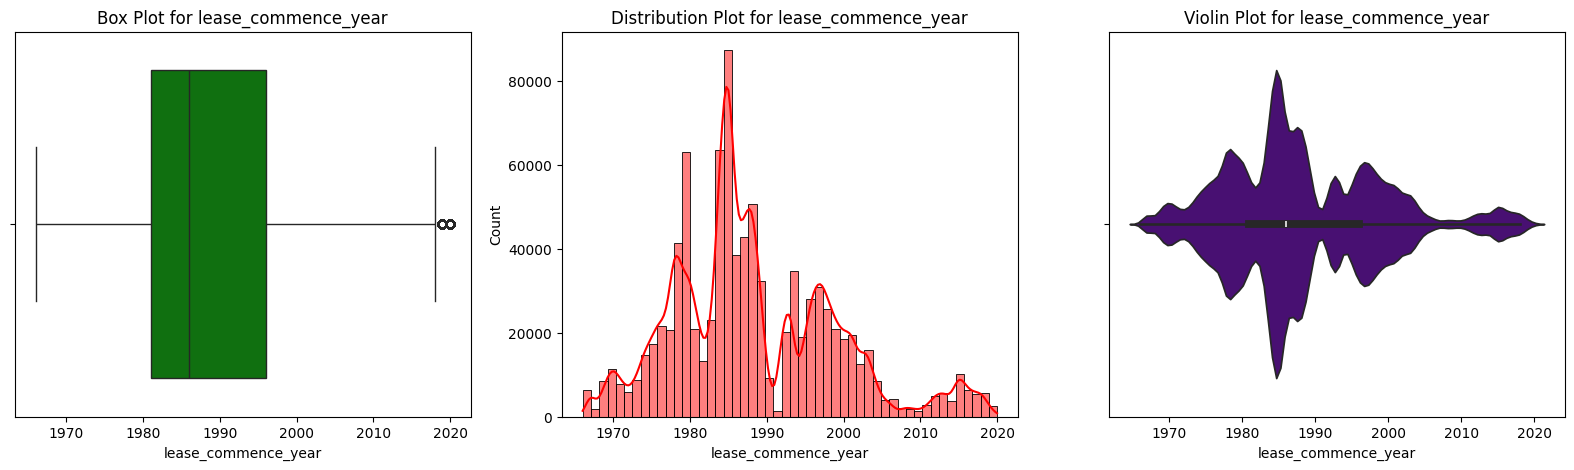

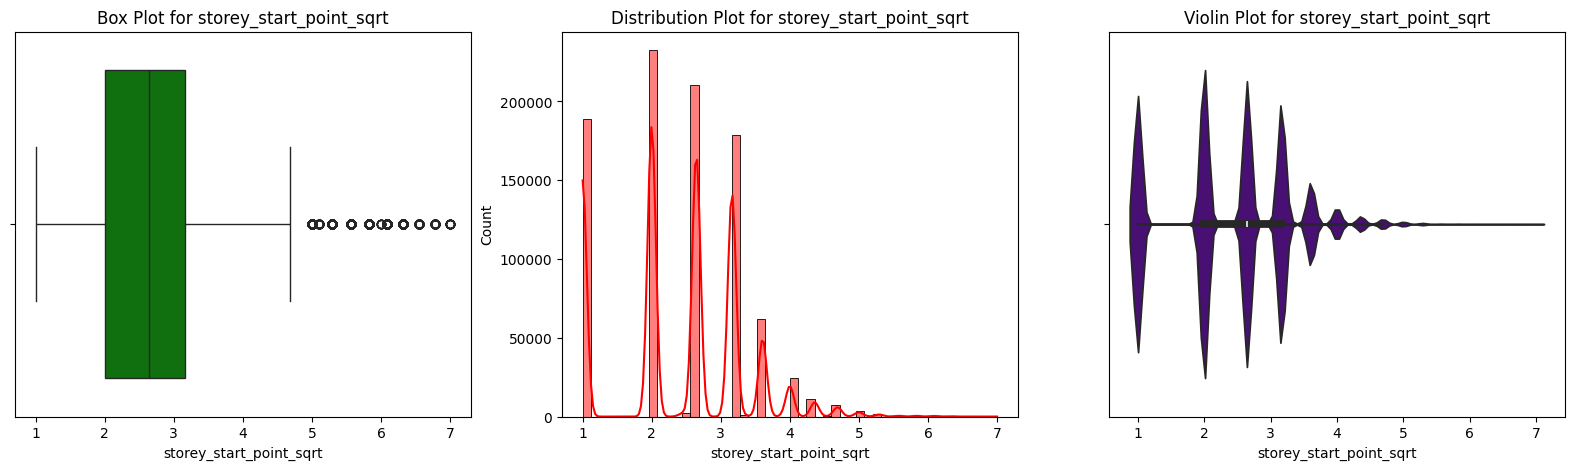

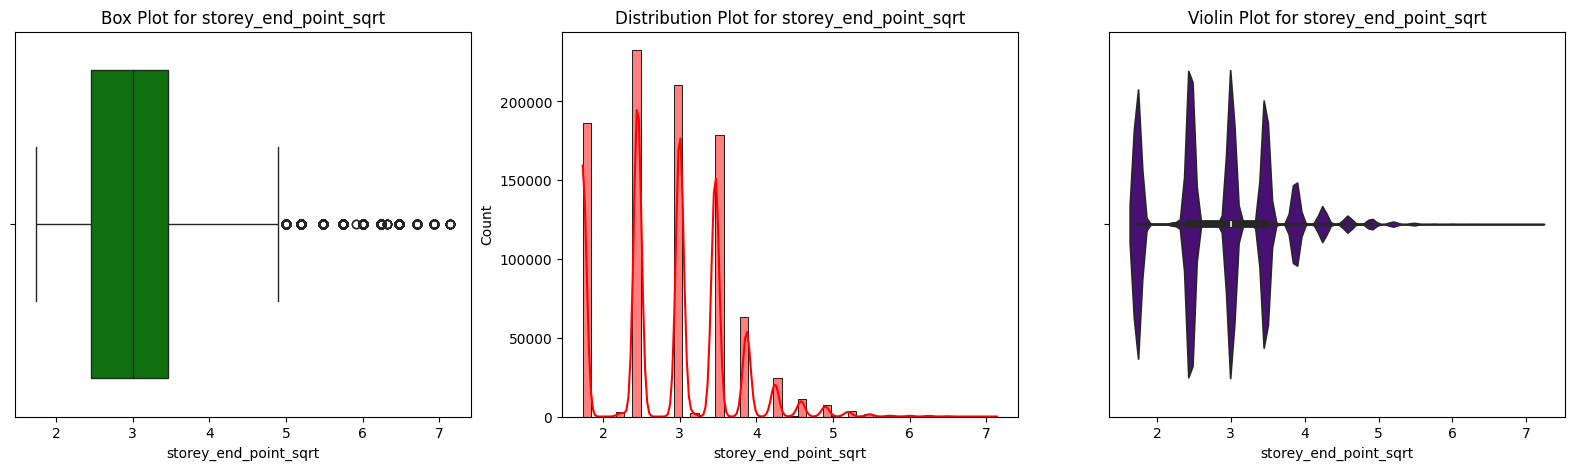

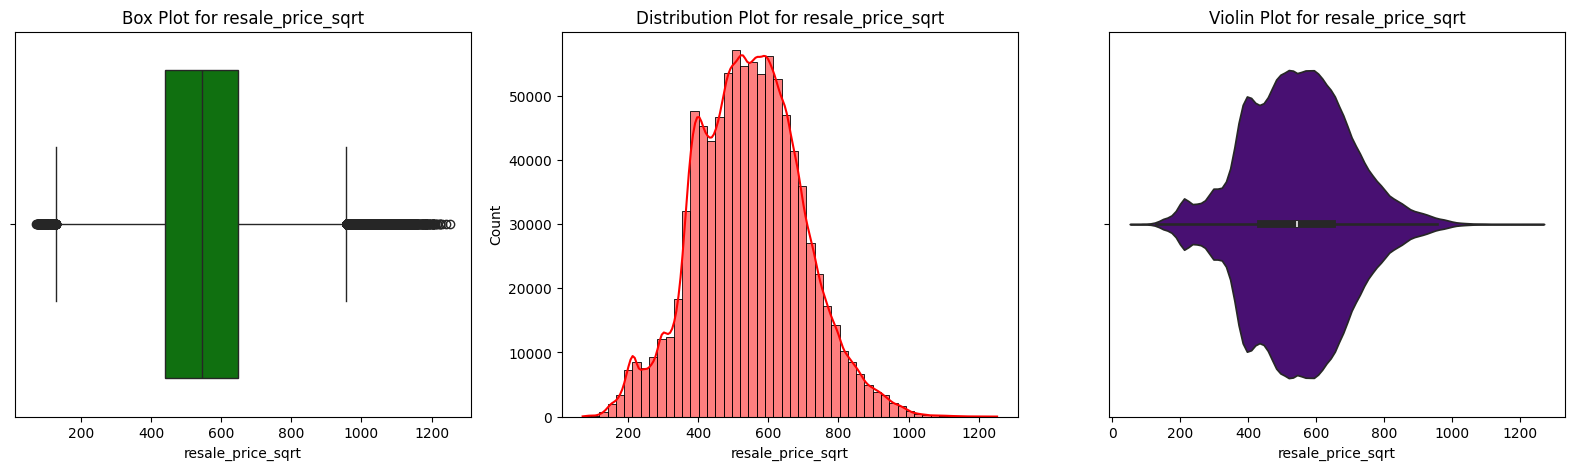

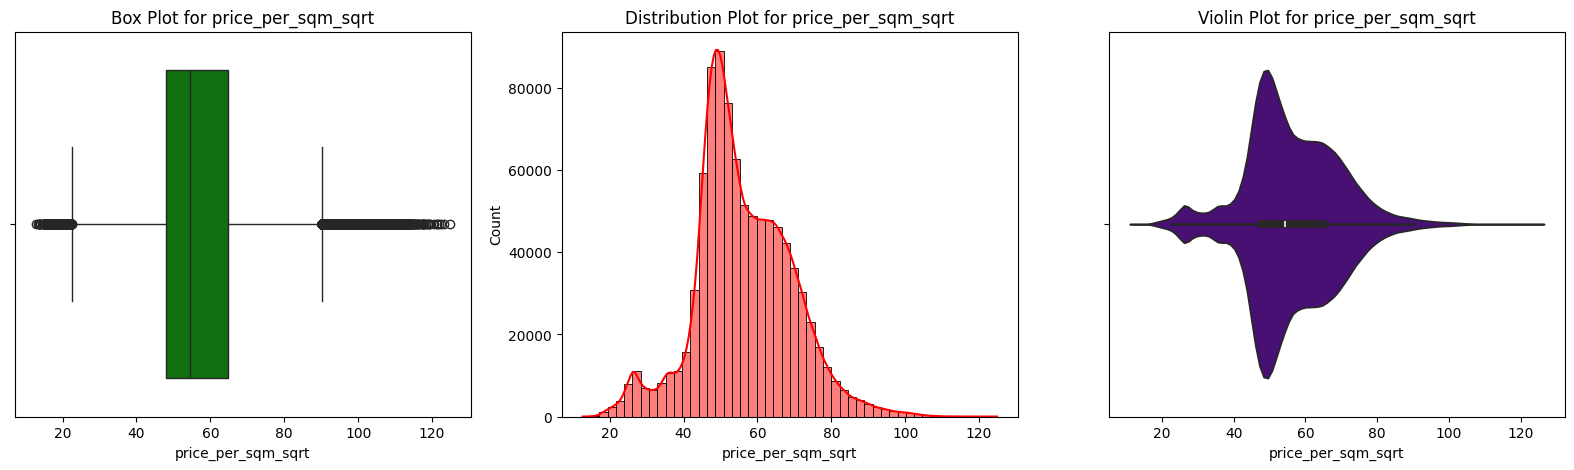

In [24]:
# plotting the features to check skew and outliers

for col in ['floor_area_sqm','lease_commence_year','storey_start_point_sqrt','storey_end_point_sqrt','resale_price_sqrt','price_per_sqm_sqrt']:
    plot(resale_df, col)

In [25]:
# Outliers Treatment

# Define the function to remove outliers using the IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q2 = df[column].quantile(0.75)
    IQR = Q2 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q2 + 1.5 * IQR
    df = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
    return df

# Apply the IQR method to continuous variables
continuous_var = ['floor_area_sqm','lease_commence_year','storey_start_point_sqrt','storey_end_point_sqrt','resale_price_sqrt','price_per_sqm_sqrt']
for col in continuous_var:
    resale_df = remove_outliers_iqr(resale_df, col)

# Check the shape of the dataframe after outlier removal
print(f"Reshaped Dataframe after Outlier Treatment: {resale_df.shape}")

# Reset the index
resale_df.reset_index(drop=True, inplace=True)

Reshaped Dataframe after Outlier Treatment: (900653, 14)


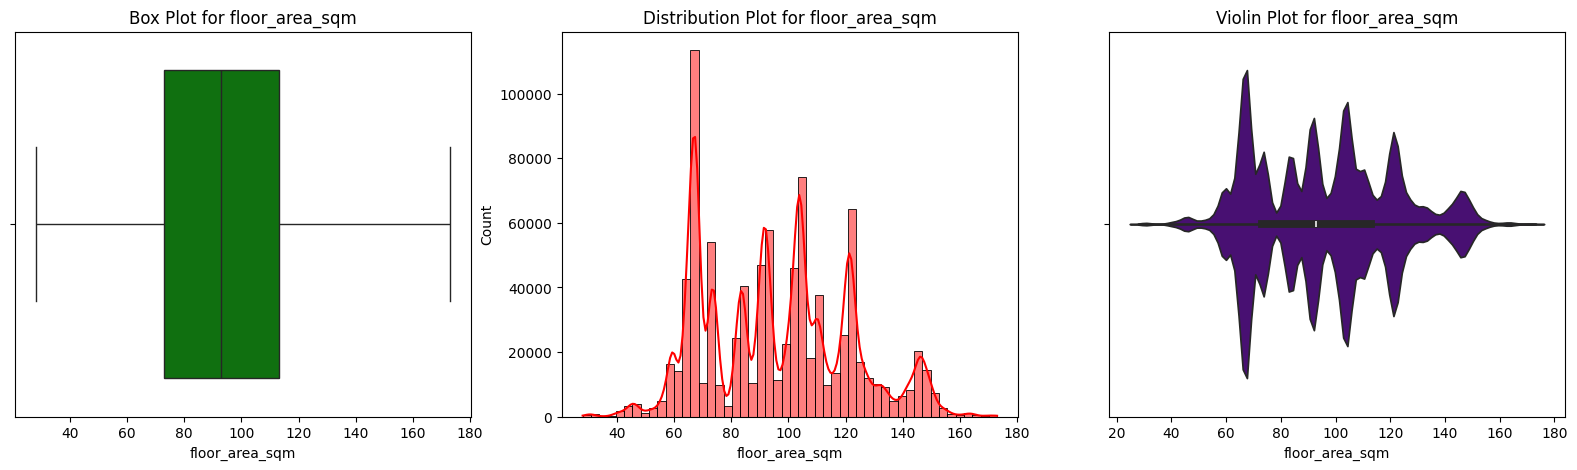

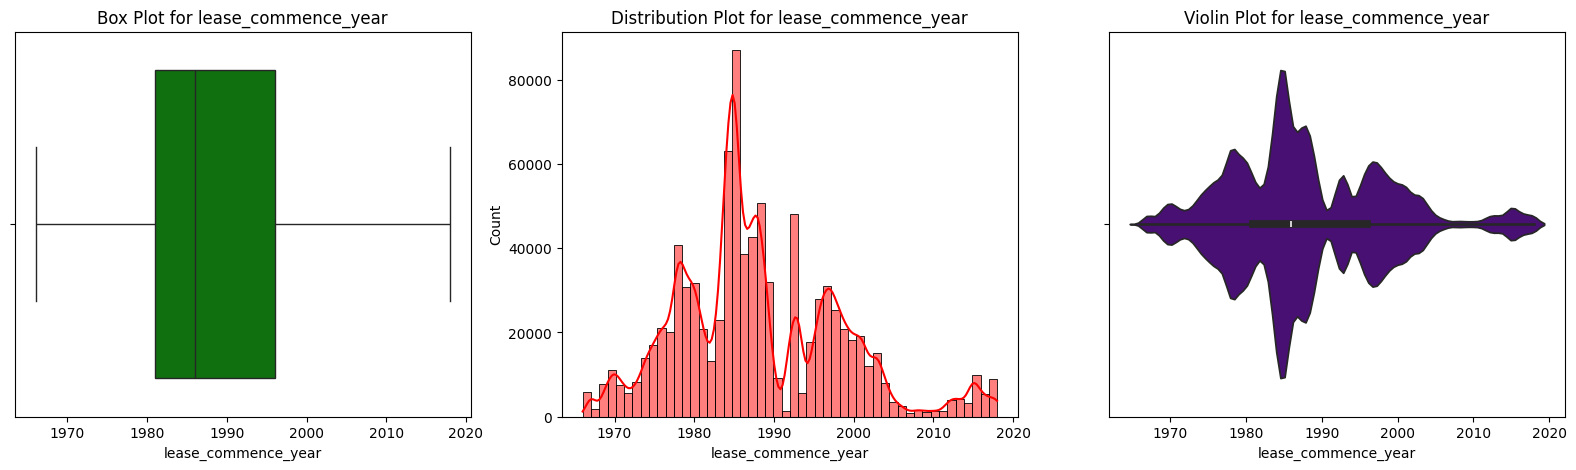

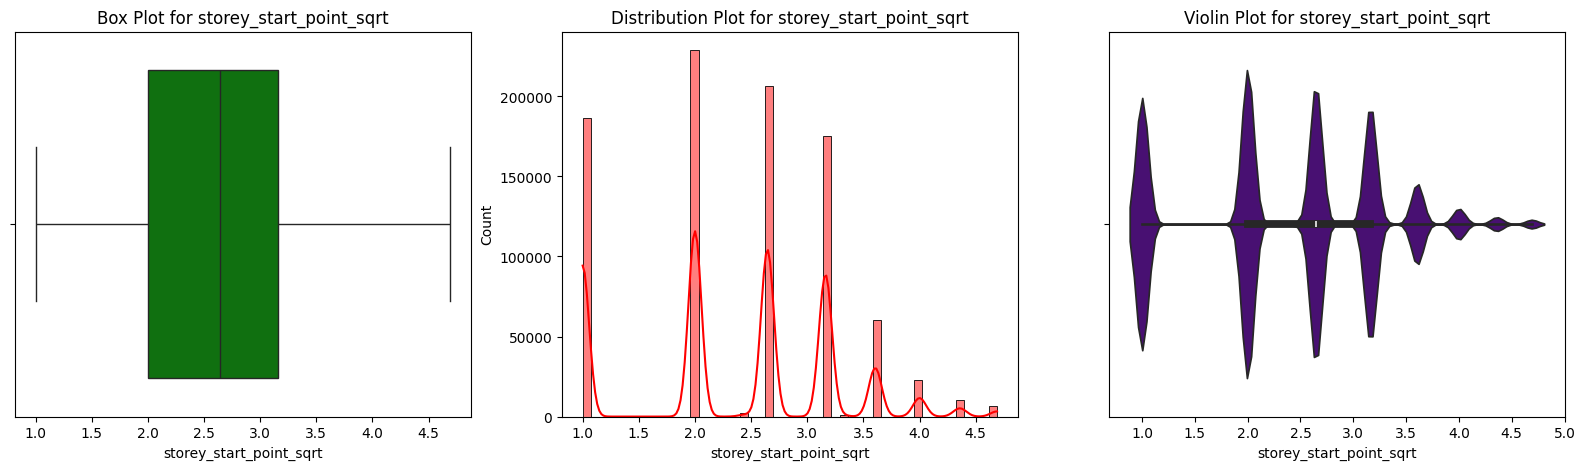

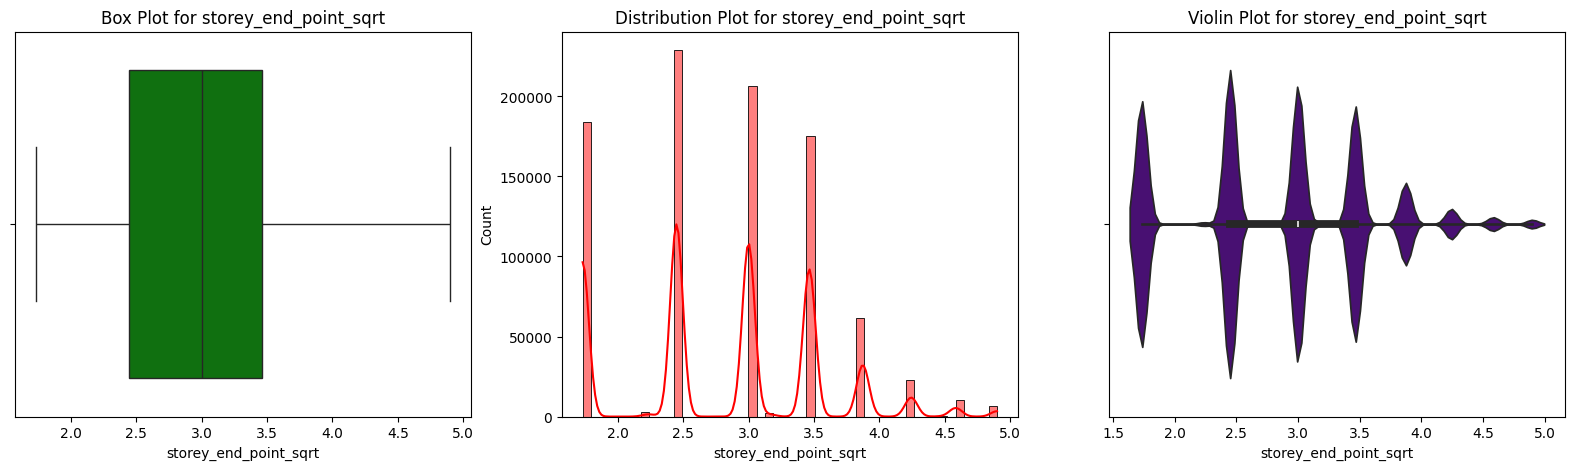

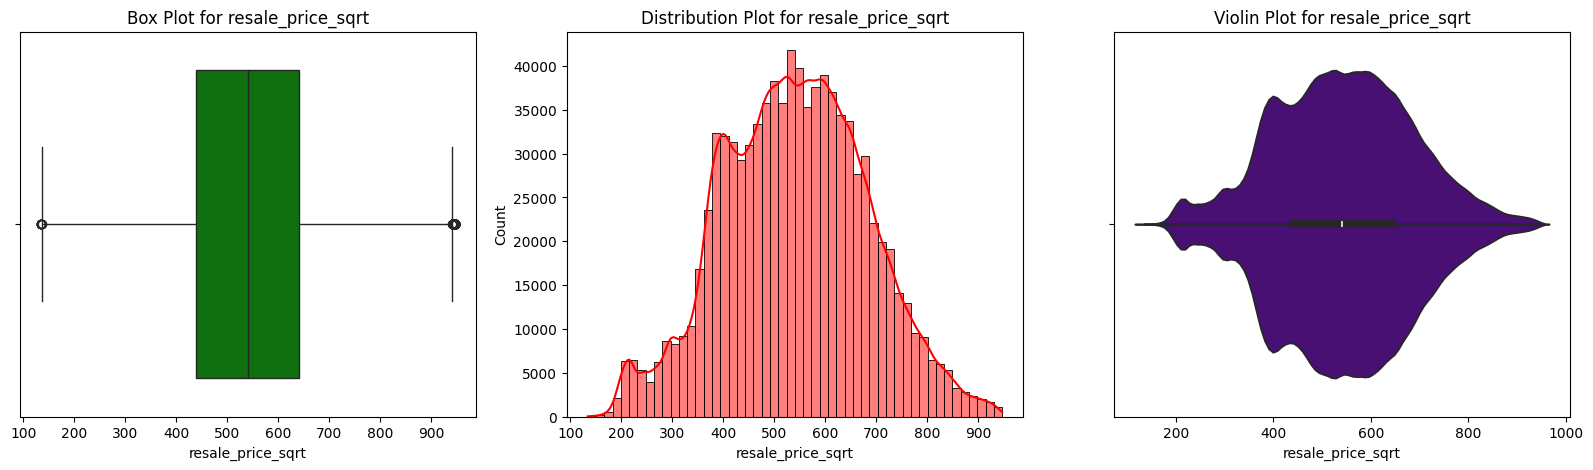

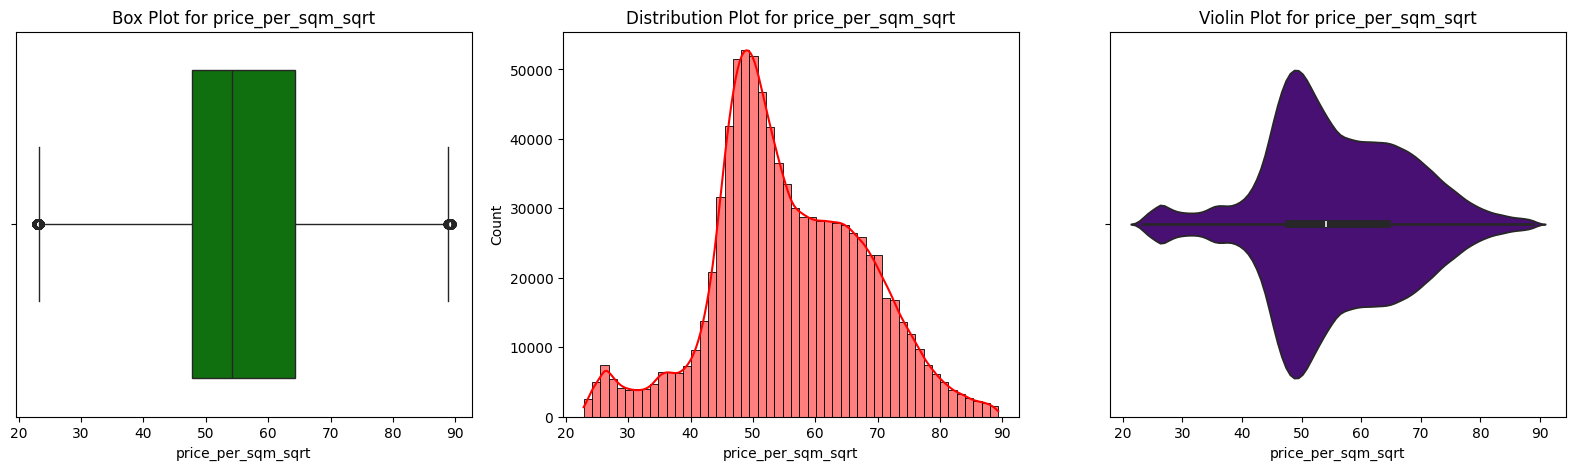

In [26]:
# plotting the features to check skew and outliers

for col in ['floor_area_sqm','lease_commence_year','storey_start_point_sqrt','storey_end_point_sqrt','resale_price_sqrt','price_per_sqm_sqrt']:
    plot(resale_df, col)

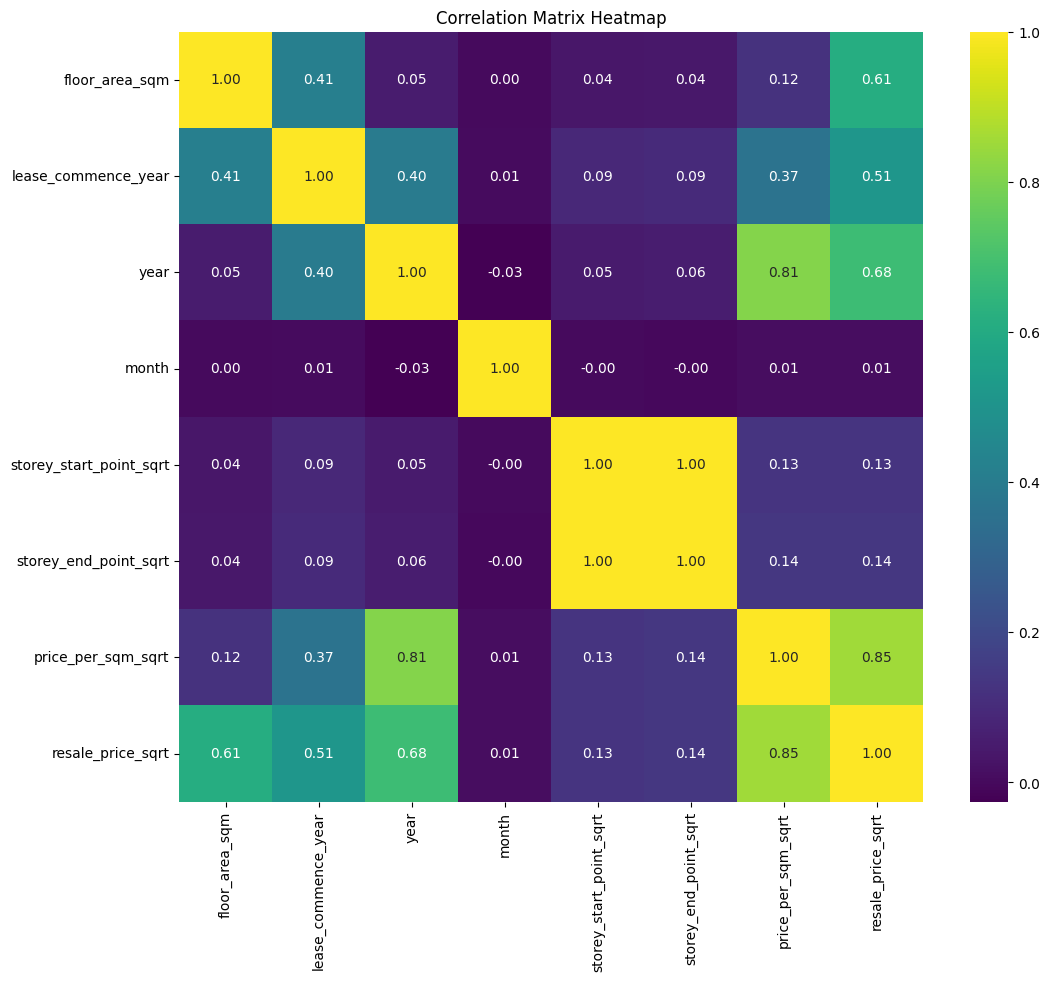

In [27]:
correlation_matrix = resale_df[['floor_area_sqm', 'lease_commence_year', 'year', 'month', 'storey_start_point_sqrt','storey_end_point_sqrt', 'price_per_sqm_sqrt','resale_price_sqrt']].corr()

plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="viridis")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [28]:
# Assuming 'correlation_matrix' is your correlation matrix DataFrame

# Print correlation values for specific columns
columns_of_interest = ['floor_area_sqm', 'lease_commence_year', 'storey_start_point_sqrt', 
                        'storey_end_point_sqrt', 'price_per_sqm_sqrt', 'resale_price_sqrt']

for column in columns_of_interest:
    print(f"Correlation with {column}: {correlation_matrix.loc['resale_price_sqrt', column]:.2f}")


Correlation with floor_area_sqm: 0.61
Correlation with lease_commence_year: 0.51
Correlation with storey_start_point_sqrt: 0.13
Correlation with storey_end_point_sqrt: 0.14
Correlation with price_per_sqm_sqrt: 0.85
Correlation with resale_price_sqrt: 1.00


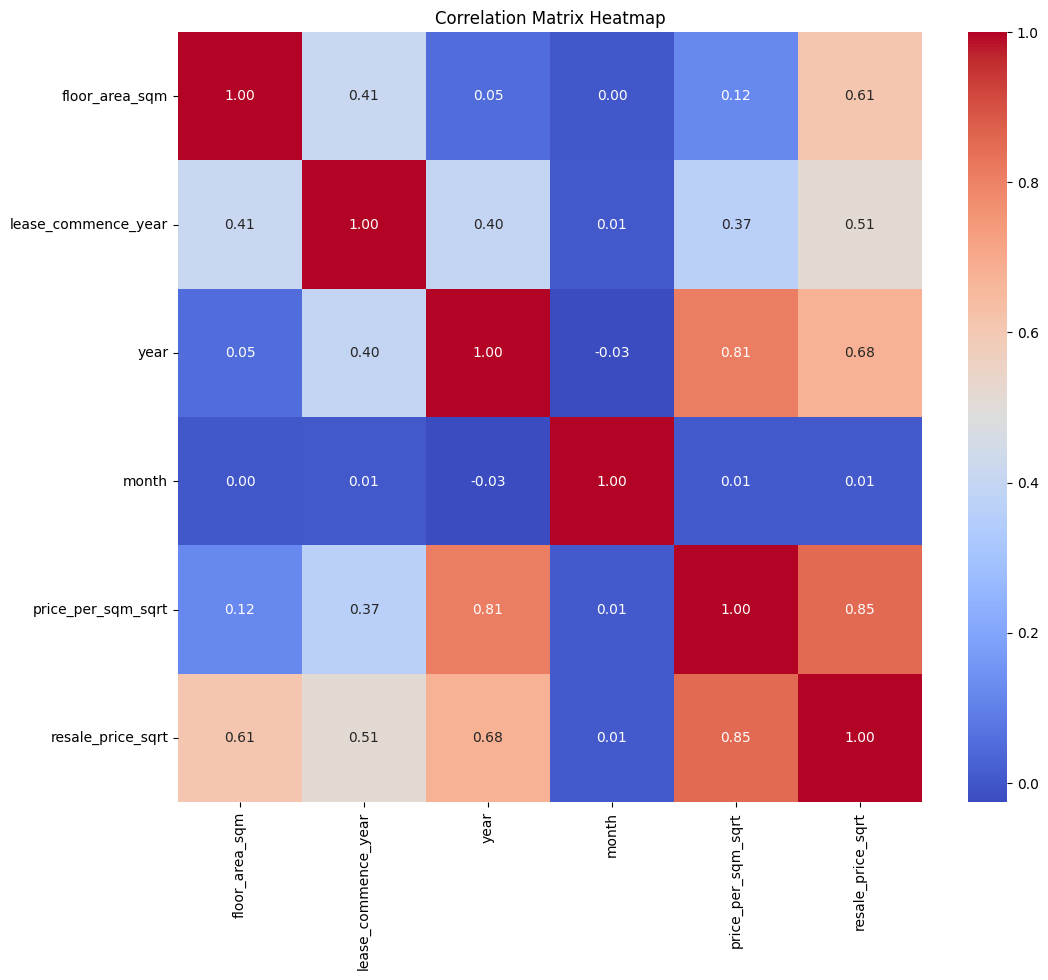

In [29]:
correlation_matrix = resale_df[['floor_area_sqm', 'lease_commence_year', 'year', 'month', 'price_per_sqm_sqrt','resale_price_sqrt']].corr()

plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [30]:
resale_df

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_year,year,month,remaining_lease,storey_start_point_sqrt,storey_end_point_sqrt,price_per_sqm_sqrt,resale_price_sqrt
0,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,1990,1,54,2.000000,2.449490,25.416530,217.255610
1,ANG MO KIO,3 ROOM,211,ANG MO KIO AVE 3,67.0,NEW GENERATION,1977,1990,1,54,1.000000,1.732051,26.191602,214.476106
2,ANG MO KIO,3 ROOM,202,ANG MO KIO AVE 3,67.0,NEW GENERATION,1977,1990,1,54,2.645751,3.000000,25.019992,204.939015
3,ANG MO KIO,3 ROOM,235,ANG MO KIO AVE 3,67.0,NEW GENERATION,1977,1990,1,54,3.162278,3.464102,23.811762,194.935887
4,ANG MO KIO,3 ROOM,235,ANG MO KIO AVE 3,67.0,NEW GENERATION,1977,1990,1,54,2.000000,2.449490,24.433583,200.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900648,YISHUN,EXECUTIVE,643,YISHUN ST 61,142.0,Apartment,1987,2024,5,54,3.162278,3.464102,75.053314,894.427191
900649,YISHUN,EXECUTIVE,827,YISHUN ST 81,146.0,Maisonette,1987,2024,1,54,1.000000,1.732051,76.746335,927.361850
900650,YISHUN,EXECUTIVE,826,YISHUN ST 81,146.0,Maisonette,1988,2024,2,54,1.000000,1.732051,74.020267,894.427191
900651,YISHUN,EXECUTIVE,824,YISHUN ST 81,142.0,Apartment,1987,2024,3,54,2.645751,3.000000,77.595103,924.662100


## Machine Learning

In [31]:
price_df=resale_df.copy()
price_df.drop(columns=['storey_start_point_sqrt','storey_end_point_sqrt'], inplace=True)
price_df.head()

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_year,year,month,remaining_lease,price_per_sqm_sqrt,resale_price_sqrt
0,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,1990,1,54,25.416530,217.255610
1,ANG MO KIO,3 ROOM,211,ANG MO KIO AVE 3,67.0,NEW GENERATION,1977,1990,1,54,26.191602,214.476106
2,ANG MO KIO,3 ROOM,202,ANG MO KIO AVE 3,67.0,NEW GENERATION,1977,1990,1,54,25.019992,204.939015
3,ANG MO KIO,3 ROOM,235,ANG MO KIO AVE 3,67.0,NEW GENERATION,1977,1990,1,54,23.811762,194.935887
4,ANG MO KIO,3 ROOM,235,ANG MO KIO AVE 3,67.0,NEW GENERATION,1977,1990,1,54,24.433583,200.000000


In [32]:
# Checking length before Encoding:

print(len(price_df['town'].unique()))
print(len(price_df['flat_type'].unique()))
print(len(price_df['block'].unique()))
print(len(price_df['street_name'].unique()))
print(len(price_df['flat_model'].unique()))

27
8
2627
579
34


In [33]:
# Pre-Processing:

# dropping hypen:
price_df['flat_type']=price_df['flat_type'].str.replace("-"," ")

# Deal with capitalized values
price_df['flat_model'] = price_df['flat_model'].str.lower()

In [34]:
from sklearn.preprocessing import LabelEncoder

def encode(df,columns):
    le = LabelEncoder()

    df[columns]=le.fit_transform(df[columns])

    keys =le.classes_
    values = le.transform(keys)

    for key,value in zip(keys,values):
        print(key,":",value)

In [35]:
encode(price_df,'town')
encode(price_df,'flat_type')
encode(price_df,'flat_model')

ANG MO KIO : 0
BEDOK : 1
BISHAN : 2
BUKIT BATOK : 3
BUKIT MERAH : 4
BUKIT PANJANG : 5
BUKIT TIMAH : 6
CENTRAL AREA : 7
CHOA CHU KANG : 8
CLEMENTI : 9
GEYLANG : 10
HOUGANG : 11
JURONG EAST : 12
JURONG WEST : 13
KALLANG/WHAMPOA : 14
LIM CHU KANG : 15
MARINE PARADE : 16
PASIR RIS : 17
PUNGGOL : 18
QUEENSTOWN : 19
SEMBAWANG : 20
SENGKANG : 21
SERANGOON : 22
TAMPINES : 23
TOA PAYOH : 24
WOODLANDS : 25
YISHUN : 26
1 ROOM : 0
2 ROOM : 1
3 ROOM : 2
4 ROOM : 3
5 ROOM : 4
EXECUTIVE : 5
MULTI GENERATION : 6
2-room : 0
3gen : 1
adjoined flat : 2
apartment : 3
dbss : 4
improved : 5
improved-maisonette : 6
maisonette : 7
model a : 8
model a-maisonette : 9
model a2 : 10
multi generation : 11
new generation : 12
premium apartment : 13
premium apartment loft : 14
premium maisonette : 15
simplified : 16
standard : 17
terrace : 18
type s1 : 19
type s2 : 20


In [36]:
price_df

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_year,year,month,remaining_lease,price_per_sqm_sqrt,resale_price_sqrt
0,0,2,216,ANG MO KIO AVE 1,73.0,12,1976,1990,1,54,25.416530,217.255610
1,0,2,211,ANG MO KIO AVE 3,67.0,12,1977,1990,1,54,26.191602,214.476106
2,0,2,202,ANG MO KIO AVE 3,67.0,12,1977,1990,1,54,25.019992,204.939015
3,0,2,235,ANG MO KIO AVE 3,67.0,12,1977,1990,1,54,23.811762,194.935887
4,0,2,235,ANG MO KIO AVE 3,67.0,12,1977,1990,1,54,24.433583,200.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
900648,26,5,643,YISHUN ST 61,142.0,3,1987,2024,5,54,75.053314,894.427191
900649,26,5,827,YISHUN ST 81,146.0,7,1987,2024,1,54,76.746335,927.361850
900650,26,5,826,YISHUN ST 81,146.0,7,1988,2024,2,54,74.020267,894.427191
900651,26,5,824,YISHUN ST 81,142.0,3,1987,2024,3,54,77.595103,924.662100


In [37]:
price_df.drop(columns=['block','street_name'], inplace=True)

In [38]:
price_df

,town,flat_type,floor_area_sqm,flat_model,lease_commence_year,year,month,remaining_lease,price_per_sqm_sqrt,resale_price_sqrt
0,0,2,73.0,12,1976,1990,1,54,25.416530,217.255610
1,0,2,67.0,12,1977,1990,1,54,26.191602,214.476106
2,0,2,67.0,12,1977,1990,1,54,25.019992,204.939015
3,0,2,67.0,12,1977,1990,1,54,23.811762,194.935887
4,0,2,67.0,12,1977,1990,1,54,24.433583,200.000000
...,...,...,...,...,...,...,...,...,...,...
900648,26,5,142.0,3,1987,2024,5,54,75.053314,894.427191
900649,26,5,146.0,7,1987,2024,1,54,76.746335,927.361850
900650,26,5,146.0,7,1988,2024,2,54,74.020267,894.427191
900651,26,5,142.0,3,1987,2024,3,54,77.595103,924.662100


In [39]:
# function to choose the best algorithm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import r2_score
import numpy as np

def best_ML_algorithm(df,algorithms):
        x=df.drop(columns=['resale_price_sqrt'],axis=1)
        y=df['resale_price_sqrt']

        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        results={}

        for algorithm in algorithms:

                model=algorithm().fit(X_train,y_train)
                y_pred=model.predict(X_test)
                
                MAE=metrics.mean_absolute_error(y_test, y_pred)
                MSE=metrics.mean_squared_error(y_test, y_pred)
                RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
                r2 = metrics.r2_score(y_test, y_pred)

                results[algorithm.__name__] = {'Mean Absolute Error':MAE,'Mean Squared Error':MSE,'Root Mean Squared Error':RMSE,
                                        'R² score':r2}
                
        best_algorithm = max(results.items(), key=lambda item: item[1]['R² score'])[0]  
        
        return best_algorithm, results

In [41]:
# using above function try to identify the best algorithm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor

algorithms = [LinearRegression, DecisionTreeRegressor, ExtraTreesRegressor, RandomForestRegressor,
            GradientBoostingRegressor]
best_algorithm, results = best_ML_algorithm(price_df, algorithms)

results_df = pd.DataFrame(results).transpose()

print("**Evaluation Metrics for All Algorithms:**")
print(results_df.to_string())

print("**Best Algorithm:**",best_algorithm)

**Evaluation Metrics for All Algorithms:**
                           Mean Absolute Error  Mean Squared Error  Root Mean Squared Error  R² score
LinearRegression                     10.347158          234.337112                15.308073  0.988327
DecisionTreeRegressor                 0.084726            0.260365                 0.510260  0.999987
ExtraTreesRegressor                   0.074901            0.204765                 0.452510  0.999990
RandomForestRegressor                 0.065755            0.092788                 0.304612  0.999995
GradientBoostingRegressor             4.362502           33.976350                 5.828924  0.998307
**Best Algorithm:** RandomForestRegressor


## Regression Model

In [41]:
from sklearn.ensemble import RandomForestRegressor

#Features & Target:
x=price_df.drop(columns=['resale_price_sqrt'],axis=1)
y=price_df['resale_price_sqrt']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Model Training:
model = RandomForestRegressor(n_estimators=150,max_depth=20)
model.fit(X_train, y_train)

# Prediction:
y_predict = model.predict(X_test)

# Evaluation:
mae = metrics.mean_absolute_error(y_test, y_predict)
mse = metrics.mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict)

print('Mean Absolute Error: {:.4f}'.format(mae))
print('Mean Squared Error: {:.4f}'.format(mse))
print('Root Mean Squared Error: {:.4f}'.format(rmse))
print('R² score: {:.4f}'.format(r2))

Mean Absolute Error: 0.0650
Mean Squared Error: 0.0923
Root Mean Squared Error: 0.3038
R² score: 1.0000


In [43]:
from sklearn.tree import DecisionTreeRegressor

#Features & Target:
x=price_df.drop(columns=['resale_price_sqrt'],axis=1)
y=price_df['resale_price_sqrt']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Model Training:
model = DecisionTreeRegressor(max_depth=20)
model.fit(X_train, y_train)

# Prediction:
y_predict = model.predict(X_test)

# Evaluation:
mae = metrics.mean_absolute_error(y_test, y_predict)
mse = metrics.mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict)

print('Mean Absolute Error: {:.4f}'.format(mae))
print('Mean Squared Error: {:.4f}'.format(mse))
print('Root Mean Squared Error: {:.4f}'.format(rmse))
print('R² score: {:.4f}'.format(r2))

Mean Absolute Error: 0.0837
Mean Squared Error: 0.2484
Root Mean Squared Error: 0.4984
R² score: 1.0000


In [45]:
#checking the features scores and importants

feature_scores = pd.Series(model.feature_importances_, index=x.columns).sort_values(ascending=False)
feature_scores

price_per_sqm_sqrt     7.269717e-01
floor_area_sqm         2.594832e-01
flat_type              1.353871e-02
lease_commence_year    2.071422e-06
flat_model             1.594968e-06
year                   1.289686e-06
town                   8.812965e-07
month                  5.992122e-07
remaining_lease        0.000000e+00
dtype: float64

In [46]:
# Pickling Regression model:

import pickle

with open("model_SG_resale_price.pkl","wb") as files:
    pickle.dump(model, files)

In [47]:
price_df

,town,flat_type,floor_area_sqm,flat_model,lease_commence_year,year,month,remaining_lease,price_per_sqm_sqrt,resale_price_sqrt
0,0,2,73.0,12,1976,1990,1,54,25.416530,217.255610
1,0,2,67.0,12,1977,1990,1,54,26.191602,214.476106
2,0,2,67.0,12,1977,1990,1,54,25.019992,204.939015
3,0,2,67.0,12,1977,1990,1,54,23.811762,194.935887
4,0,2,67.0,12,1977,1990,1,54,24.433583,200.000000
...,...,...,...,...,...,...,...,...,...,...
900648,26,5,142.0,3,1987,2024,5,54,75.053314,894.427191
900649,26,5,146.0,7,1987,2024,1,54,76.746335,927.361850
900650,26,5,146.0,7,1988,2024,2,54,74.020267,894.427191
900651,26,5,142.0,3,1987,2024,3,54,77.595103,924.662100


In [48]:
#load the pickle:

with open('model_SG_resale_price.pkl','rb') as files:
    predict_model=pickle.load(files)

In [50]:
#predict the Resale price with regressor model

input=predict_model.predict(np.array([[0,2,73.0,12,1976,1990,1,54,25.416530]]))
predict_resale_price = input[0] ** 2

print(f"Predicted Resale Price: {predict_resale_price:.2f}")

Predicted Resale Price: 47200.00


In [ ]:
!pip install -r requirements.txt


In [ ]:
!pip freeze > requirements.txt
